In [1]:
import numpy as np
import matplotlib.pyplot as plt

# How to find L??
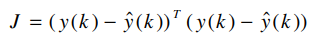

In [2]:
def algorithm_MSE(y, y_hat, A, H, C, rho, eta, L, max_iter=72):
    n = len(A)
    C = C.reshape(1, 2)
    L = L.reshape(2, 1)
    for k in range(2, max_iter):

        # Compute the partial derivative of x_hat with respect to L
        dxhat_dL = ((A + rho[k-1] * H)  - (L @ C)) * (y[k-2] - y_hat[k-2]) + (y[k-1] - y_hat[k-1]) * np.ones((n, n))

        dJ_dL = -2 * (((y[k] - y_hat[k])) * C) @ dxhat_dL

        transpose_dJ_dL = dJ_dL.reshape(2, 1)
        # Update the gain matrix L
        L = L - eta * transpose_dJ_dL

    return L

# After initializing L

we rewrite the state space formulation:


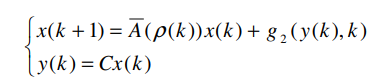

where:

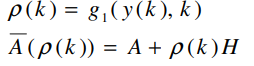




In [3]:
x1 = np.zeros(101)
x2 = np.zeros(101)
y = np.zeros(100)

# Initial conditions
x1[0] = 1
x2[0] = 1

# Perform the iteration
for k in range(100):
    x1[k+1] = x2[k] + 1 - 1.4*x1[k]**2
    x2[k+1] = 0.3*x1[k]
    y[k] = x1[k]


A = np.array([[0, 1], [0.3, 0]])
H = np.array([[-1.4, 0], [0, 0]])  # Placeholder for system matrix H
C = np.array([1, 0])  # Placeholder for system matrix C
rho = y  # Example scalar value for rho
eta = 0.02  # Learning rate


In [5]:
from sklearn.metrics import mean_squared_error


Ws = np.zeros((100, 2, 2))
C = C.reshape(1, 2)
X_hat = np.zeros((101, 2, 1))
x1_hat = np.zeros(101)
y_hat = np.zeros(100)
x2_hat = np.zeros(101)
g2 = np.array([1, 0])
g2 = g2.reshape(2, 1)
L_updated = np.array([0.32, 0.3335])
L_updated = L_updated.reshape(2, 1)

for k in range(100):
    Ws[k] = A + rho[k] * H - L_updated @ C
    X_hat[k+1] = Ws[k]@X_hat[k] + L_updated*y[k] + g2
    x1_hat[k] = X_hat[k][0]
    x2_hat[k] = X_hat[k][1]
    y_hat[k] = x1_hat[k]


mse = mean_squared_error(y, y_hat)

print("Mean Squared Error of output:", mse)



Mean Squared Error of output: 0.11629922906012884


<ipython-input-5-a55c0e4d94ee>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1_hat[k] = X_hat[k][0]
<ipython-input-5-a55c0e4d94ee>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2_hat[k] = X_hat[k][1]


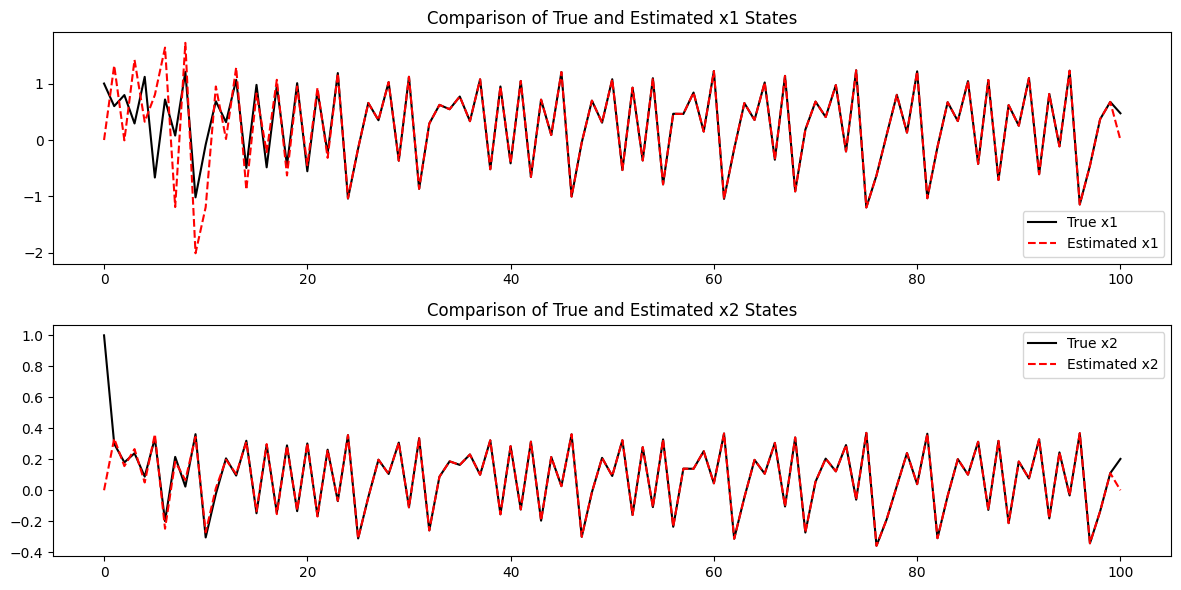

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x1, 'k', label='True x1')
plt.plot(x1_hat, 'r--', label='Estimated x1')
plt.legend()
plt.title("Comparison of True and Estimated x1 States")

plt.subplot(2, 1, 2)
plt.plot(x2, 'k', label='True x2')
plt.plot(x2_hat, 'r--', label='Estimated x2')
plt.legend()
plt.title("Comparison of True and Estimated x2 States")


plt.tight_layout()
plt.show()

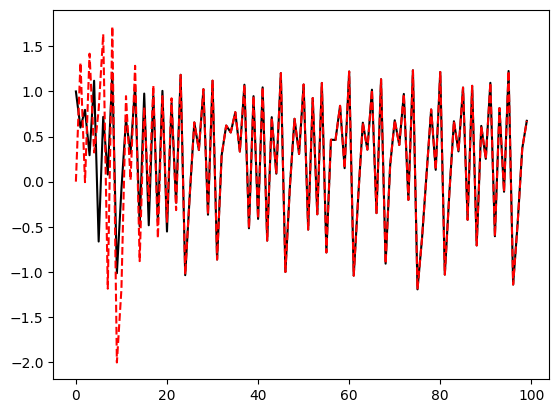

In [7]:
plt.plot(y, 'k', label='y')
plt.plot(y_hat, 'r--', label='y_hat')